In [43]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import defaultdict
from time import time

import pickle

%matplotlib inline
np.random.seed(100)

In [287]:
# Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

#For tuning the hyper-parameters

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#importing metrics

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [288]:
# UnPickling data

with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\X_train.pickle','rb') as data:
    X_train= pickle.load(data)

with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\X_test.pickle','rb') as data:
    X_test=pickle.load(data)
    

with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\Y_train.pickle','rb') as data:
    Y_train=pickle.load(data)

with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\Y_test.pickle','rb') as data:
    Y_test=pickle.load(data)
    
#unpickling df_model
with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\df_model.pickle','rb') as data:
    df_model=pickle.load(data)


In [143]:
#Training Decision Tree
DT=DecisionTreeClassifier(max_depth=3,ccp_alpha=0)

In [144]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
559,11,85.0,74.0,23.0,37.0,30.10,0.300,35
365,5,99.0,72.0,28.0,83.0,34.00,0.499,30
333,12,106.0,80.0,23.0,37.0,23.60,0.137,44
577,2,118.0,80.0,23.0,37.0,32.25,0.693,21
69,4,146.0,85.0,27.0,37.0,28.90,0.189,27
...,...,...,...,...,...,...,...,...
613,6,105.0,80.0,28.0,37.0,32.50,0.878,26
394,3,158.0,78.0,23.0,37.0,32.90,0.362,31
401,6,137.0,61.0,23.0,37.0,24.20,0.151,55
307,0,137.0,68.0,14.0,148.0,24.80,0.362,21


In [145]:
from time import time as t0
t1=time.time()
DT.fit(X_train,Y_train)
print("Test_Score:",DT.score(X_test,Y_test)*100)
print("Train_score:",DT.score(X_train,Y_train)*100)
t_end=t0()-t1
print(t_end)

Test_Score: 78.74015748031496
Train_score: 78.45849802371542
0.006908893585205078


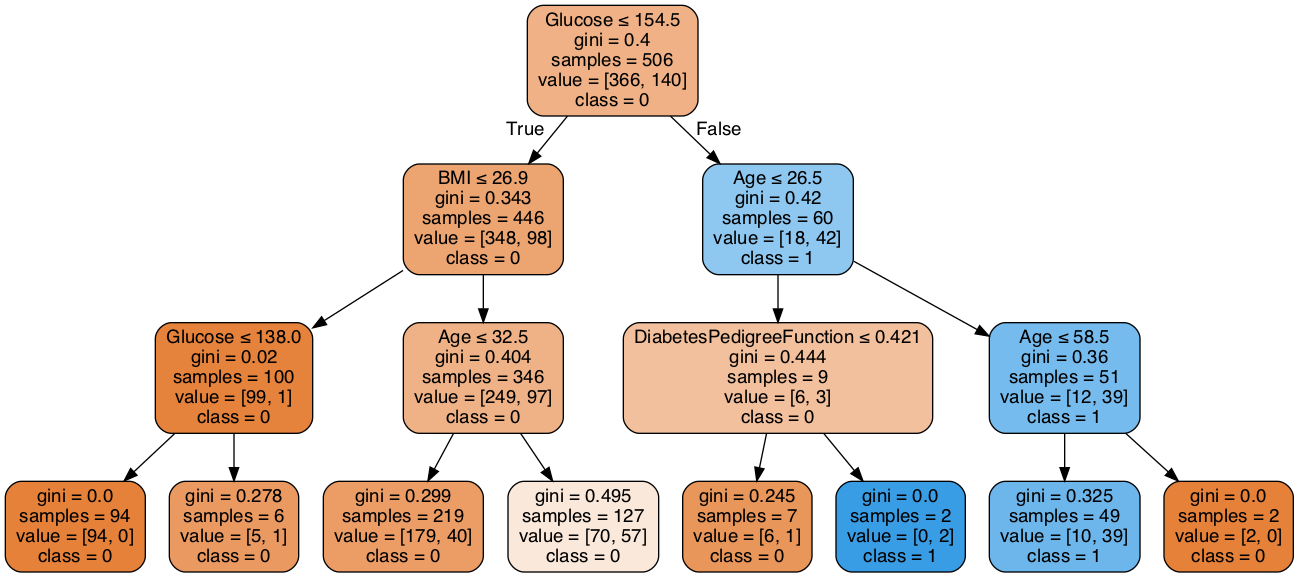

In [146]:
#Visualizing Decision Trees
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_train.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [147]:
Feature_importance=DT.feature_importances_

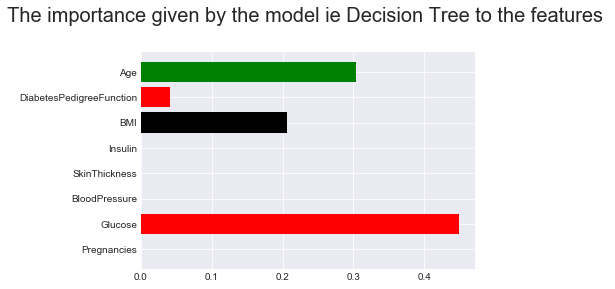

In [148]:
#use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.style.use('seaborn-darkgrid')
mycolors=['black', 'red', 'green', 'blue', 'cyan']
plt.title("The importance given by the model ie Decision Tree to the features ",fontsize=20,pad=30)
plt.barh(X_train.columns,Feature_importance,color=['black', 'red', 'green', 'blue', 'cyan'])
plt.show()

## From the above chart, we can see that Decision Tree model has considered Age,BMI and Glucose as highest 

In [123]:
# Lets repeat the training by removing Insulin, SkinThickness and Pregnancies

X_train_new=X_train[["Age","DiabetesPedigreeFunction","BMI","SkinThickness","Glucose"]]
X_test_new=X_test[["Age","DiabetesPedigreeFunction","BMI","SkinThickness","Glucose"]]


In [124]:
from time import time as t0
t1=time.time()
DT.fit(X_train_new,Y_train)
print("Test_Score:",DT.score(X_test_new,Y_test)*100)
print("Train_score:",DT.score(X_train_new,Y_train)*100)
t_end=t0()-t1
print(t_end)

Test_Score: 78.74015748031496
Train_score: 78.45849802371542
0.0069468021392822266


### As we have observed nothing much has changed even though we removed these features

## Tuning the hyperparameters of decision tree using RandomizedsearchCV and CrossValidationSearchCV

In [126]:
#Training Decision Tree
DT_new=DecisionTreeClassifier()

In [127]:
DT_new.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')>

In [159]:
# I will be selecting criterion, max_depth, max_features,min_samples_leaf,min_samples_split
# defining a range for all of these

criterion=['gini','entropy']
max_depth=[int(x) for x in np.linspace(start = 1, stop = 10, num = 5)]
max_features=['sqrt','auto','log2']
min_samples_leaf=[i for i in range(1,20)]
min_samples_split=[int(x) for x in np.linspace(start = 2, stop = 40, num = 5)]
random_grid={'criterion':criterion, 'max_depth':max_depth, 'max_features':max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}
print(random_grid)

{'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 5, 7, 10], 'max_features': ['sqrt', 'auto', 'log2'], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_split': [2, 11, 21, 30, 40]}


In [160]:
random_search=RandomizedSearchCV(estimator=DT_new,param_distributions=random_grid,scoring='accuracy',cv=5,return_train_score=True)

In [161]:
random_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [171]:
print(random_search.best_params_)
print(random_search.best_estimator_)
print(random_search.best_score_)

{'min_samples_split': 11, 'min_samples_leaf': 10, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'entropy'}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=11,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
0.746981168705106


In [219]:
#Using the gridsearchcv based on the outputs of randomsearch
criterion=['entropy']
max_depth=[3]
max_features=['log2']
min_samples_leaf=[9,10,11,12,13]
min_samples_split=[9,10,11,12,13]
gridsearch_grid={'criterion':criterion, 'max_depth':max_depth, 'max_features':max_features,'min_samples_leaf':min_samples_leaf,'min_samples_split':min_samples_split}
print(gridsearch_grid)

{'criterion': ['entropy'], 'max_depth': [3], 'max_features': ['log2'], 'min_samples_leaf': [9, 10, 11, 12, 13], 'min_samples_split': [9, 10, 11, 12, 13]}


In [220]:
grid_search=GridSearchCV(estimator=DT_new,param_grid=gridsearch_grid,scoring='accuracy',cv=5)

In [221]:
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy'], 'max_depth': [3],
         

In [295]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11, min_samples_split=12,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [296]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_leaf': 11,
 'min_samples_split': 12}

In [297]:
print(random_search.best_score_)

0.746981168705106


In [298]:
print(grid_search.best_score_*100)

76.08425548437197


In [258]:
# Training accuracy
print("The training accuracy is: ")
train_acc=accuracy_score(Y_train, grid_search.predict(X_train))*100
print(train_acc)

The training accuracy is: 
77.27272727272727


In [299]:
#Test Accuracy
print("The test accuracy is: ")
test_acc=accuracy_score(Y_test, grid_search.predict(X_test))*100
print(test_acc)

The test accuracy is: 
79.52755905511812


### Classification Report

In [300]:
#getting the classification report
print(classification_report(Y_test, grid_search.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87        92
           1       0.91      0.29      0.43        35

    accuracy                           0.80       127
   macro avg       0.85      0.64      0.65       127
weighted avg       0.82      0.80      0.75       127



## Confusion Matrix

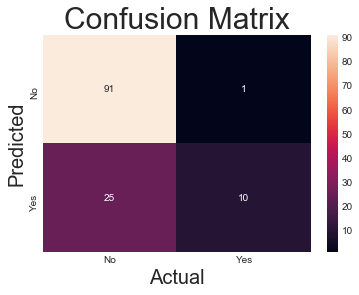

In [301]:
Conf_matrix=confusion_matrix(Y_test, grid_search.predict(X_test))
sns.heatmap(data=Conf_matrix,annot=True,yticklabels=(["No","Yes"]),xticklabels=(["No","Yes"]));
plt.xlabel("Actual",fontsize=20);
plt.ylabel("Predicted",fontsize=20);
plt.title("Confusion Matrix",fontsize=30);


## Saving decision tree accuracies into dataframe

In [302]:
df_model_current=pd.DataFrame({'Model':["Random Forest"],'Train_Accuracy':[train_acc],'Test_Accuracy':[test_acc]},index=[2])

In [303]:
df_model=pd.concat([df_model,df_model_current],axis=0)

In [304]:
df_model

,Model,Train_Accuracy,Test_Accuracy
0,KNN,77.842692,75.661792
1,Decision Tree,77.272727,79.527559
2,Random Forest,77.272727,79.527559


In [305]:
# Pickling dataframe
with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\df_model.pickle','wb') as output:
    pickle.dump(df_model, output)


In [306]:
#pickling DT model
with open('F:\Syed Issam Bukhari\Diabetes Detection\Pickles\DecisionTree.pickle','wb') as output:
    pickle.dump(DT_new, output)
